In [22]:
# Install kagglehub if not already installed
!pip install kagglehub

import kagglehub
import pandas as pd
import os

# Download the Sentiment140 dataset
dataset_path = kagglehub.dataset_download('kazanova/sentiment140')

# The dataset is a CSV file named 'training.1600000.processed.noemoticon.csv'
# Find the CSV file in the downloaded dataset directory
csv_file = os.path.join(dataset_path, 'training.1600000.processed.noemoticon.csv')

# Define column names as the dataset doesn't have a header
cols = ['sentiment', 'id', 'date', 'query_string', 'user', 'text']

# Read the CSV file with proper encoding
df = pd.read_csv(csv_file, header=None, names=cols, encoding='latin-1')

# Save the dataset to your Colab environment
output_path = '/content/sentiment140.csv'
df.to_csv(output_path, index=False)

print(f"Dataset downloaded and saved to {output_path}")

# Optional: Display the first few rows
print(df.head())

Dataset downloaded and saved to /content/sentiment140.csv
   sentiment          id                          date query_string  \
0          0  1467810369  Mon Apr 06 22:19:45 PDT 2009     NO_QUERY   
1          0  1467810672  Mon Apr 06 22:19:49 PDT 2009     NO_QUERY   
2          0  1467810917  Mon Apr 06 22:19:53 PDT 2009     NO_QUERY   
3          0  1467811184  Mon Apr 06 22:19:57 PDT 2009     NO_QUERY   
4          0  1467811193  Mon Apr 06 22:19:57 PDT 2009     NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  


The dataset used in this project is designed for sentiment analysis on Twitter. Each tweet in the dataset is annotated with sentiment labels, specifically 0 for negative sentiment and 4 for positive sentiment.

# Import Libraries and Read Data

In [23]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Visualization
import warnings
warnings.simplefilter (action = 'ignore') # To prevent warnings from appearing in the console output of the program

In [24]:
# To find out the size of the dataset file

# The file was downloaded and saved to '/content/sentiment140.csv'
file_size_mb = os.path.getsize('/content/sentiment140.csv') / (1024 * 1024)  # MB type
print(f"Data size: {file_size_mb:.2f} MB")

Data size: 210.27 MB


In [25]:
# The dataset is read from a CSV file.
df = pd.read_csv('/content/sentiment140.csv', encoding='ISO-8859-1')


# Randomly sampling 10,000 rows from the dataset and data is saved into the df_sampled.

df_sampled = df.sample(n=10000, random_state=1)

* Due to the large size of the dataset and the specific ordering of negative and positive sentiment features, a random sample of the data was extracted using the df.sample filter.
* ISO-8859-1 encoding was used to ensure proper handling of special characters in the file.

# EDA - Exploratory Data Analysis

Exploratory Data Analysis involves analyzing the basic characteristics of the dataset, such as missing values, data types, and general structure. It also includes visualization and graphical representation to better understand the data.

In [26]:
df_sampled.head() # calls the first 5 rows of the df_sampled

,sentiment,id,date,query_string,user,text
514293,0,2190584004,Tue Jun 16 03:08:48 PDT 2009,NO_QUERY,Vicki_Gee,i miss nikki nu nu already shes always there ...
142282,0,1881451988,Fri May 22 04:42:15 PDT 2009,NO_QUERY,PatCashin,So I had a dream last night. I remember a sig...
403727,0,2058252964,Sat Jun 06 14:34:17 PDT 2009,NO_QUERY,deelectable,@girlyghost ohh poor sickly you (((hugs)) ho...
649503,0,2237307600,Fri Jun 19 05:34:22 PDT 2009,NO_QUERY,justinekepa,it is raining again
610789,0,2224301193,Thu Jun 18 09:20:06 PDT 2009,NO_QUERY,cmatt007,@MissKeriBaby wish I was in LA right now


In [27]:
df_sampled.info() # accesses the basic information of the df_sampled

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 514293 to 1419723
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sentiment     10000 non-null  int64 
 1   id            10000 non-null  int64 
 2   date          10000 non-null  object
 3   query_string  10000 non-null  object
 4   user          10000 non-null  object
 5   text          10000 non-null  object
dtypes: int64(2), object(4)
memory usage: 804.9+ KB


* Dataset is non-null and provides information about data types.

In [28]:
df_sampled.isna().sum()  # calculates the total number of missing (NaN) values for each column in the df_sampled

,0
sentiment,0
id,0
date,0
query_string,0
user,0
text,0


* isna() method identifies missing values in the DataFrame and returns True for NaN values, and False otherwise.
* .sum() method then counts the number of True values for each column, effectively adding up the missing values.
* info() method verified that there were no null (NaN) values.

In [29]:
df_sampled.duplicated().sum() # checks for duplicate rows in the `df_sampled` DataFrame and counts the number of such duplicates

np.int64(0)

* df_sampled.duplicated() returns a boolean Series indicating whether each row is a duplicate.
* .sum() calculates the total number of duplicates by summing the True values in the Series.

In [30]:
df_sampled.columns = ['sentiment', 'ids', 'date', 'flag', 'user', 'tweets']  # update column names more readable

print(df_sampled.head())

        sentiment         ids                          date      flag  \
514293          0  2190584004  Tue Jun 16 03:08:48 PDT 2009  NO_QUERY   
142282          0  1881451988  Fri May 22 04:42:15 PDT 2009  NO_QUERY   
403727          0  2058252964  Sat Jun 06 14:34:17 PDT 2009  NO_QUERY   
649503          0  2237307600  Fri Jun 19 05:34:22 PDT 2009  NO_QUERY   
610789          0  2224301193  Thu Jun 18 09:20:06 PDT 2009  NO_QUERY   

               user                                             tweets  
514293    Vicki_Gee  i miss nikki nu nu already  shes always there ...  
142282    PatCashin  So I had a dream last night. I  remember a sig...  
403727  deelectable  @girlyghost ohh poor sickly you   (((hugs)) ho...  
649503  justinekepa                               it is raining again   
610789     cmatt007          @MissKeriBaby wish I was in LA right now   


In [31]:
df_filtered = df_sampled[['sentiment', 'tweets']]

* Creates a new DataFrame df_filtered by selecting only the 'sentiment' and 'tweets' columns from the df_sampled DataFrame
* This operation filters the DataFrame to include only the relevant columns for further analysis

In [32]:
print(df_filtered.head())


        sentiment                                             tweets
514293          0  i miss nikki nu nu already  shes always there ...
142282          0  So I had a dream last night. I  remember a sig...
403727          0  @girlyghost ohh poor sickly you   (((hugs)) ho...
649503          0                               it is raining again 
610789          0          @MissKeriBaby wish I was in LA right now 


# Data Preprocessing

Data Preprocessing involves steps such as cleaning the dataset, normalizing data, and splitting the dataset into training and test sets. This process ensures the data is prepared for effective analysis and modeling.

## Convert to Lower Case



In [33]:
# Convert to lower case
df_filtered['tweets'] = [token.lower() for token in df_filtered['tweets']]
df_filtered.head(5)

,sentiment,tweets
514293,0,i miss nikki nu nu already shes always there ...
142282,0,so i had a dream last night. i remember a sig...
403727,0,@girlyghost ohh poor sickly you (((hugs)) ho...
649503,0,it is raining again
610789,0,@misskeribaby wish i was in la right now


## Remove @ Mentions and Hyperlinks



In [34]:
# Remove @ mentions
df_filtered['tweets'] = df_filtered['tweets'].replace('@[A-Za-z0-9]+', '', regex=True)

In [35]:
# Remove hyperlinks
df_filtered['tweets'] = df_filtered['tweets'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)

# Verify removal
found = df_filtered[df_filtered['tweets'].str.contains('http')]
found.count()

,0
sentiment,0
tweets,0


## Remove Punctuations and Numbers



In [36]:
import string
import re
# Remove numbers
texts = df_filtered['tweets'].copy()
new_text = [re.sub('[0-9]+', '', text) for text in texts]
df_filtered['tweets'] = new_text

In [37]:
# Remove punctuations
table = str.maketrans('', '', string.punctuation)
texts = df_filtered['tweets'].copy()
new_text = [' '.join([w.translate(table) for w in text.split()]) for text in texts]
df_filtered['tweets'] = new_text
df_filtered['tweets'].head(5)

,tweets
514293,i miss nikki nu nu already shes always there w...
142282,so i had a dream last night i remember a sign ...
403727,ohh poor sickly you hugs hope you feel a littl...
649503,it is raining again
610789,wish i was in la right now


**NLTK (Natural Language Toolkit)** library for text processing.

* **nltk.download('stopwords')**: Downloads the NLTK list of stopwords. This list contains common words like 'the', 'is', and 'and' that are usually irrelevant for text analysis.
* **nltk.download('punkt')**: Downloads the 'punkt' model necessary for text tokenization. This model is used for splitting text into sentences and words.
* **nltk.download('wordnet')**: Downloads the WordNet lexical database. This database contains semantic relationships between words and is used for lemmatization (reducing words to their base or root form).

In [38]:
# import libraries for performing text search and manipulation tasks, such as pattern matching, text extraction, and text substitution

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [39]:
# necessary NLTK data

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [40]:
import nltk
nltk.download('punkt_tab')

# word tokenization of tweets
df_filtered['words'] = df_filtered['tweets'].apply(word_tokenize)

print(df_filtered[['tweets', 'words']].head())

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


                                                   tweets  \
514293  i miss nikki nu nu already shes always there w...   
142282  so i had a dream last night i remember a sign ...   
403727  ohh poor sickly you hugs hope you feel a littl...   
649503                                it is raining again   
610789                         wish i was in la right now   

                                                    words  
514293  [i, miss, nikki, nu, nu, already, shes, always...  
142282  [so, i, had, a, dream, last, night, i, remembe...  
403727  [ohh, poor, sickly, you, hugs, hope, you, feel...  
649503                           [it, is, raining, again]  
610789                 [wish, i, was, in, la, right, now]  


## TOKENIZATION



## Stopwords ve Lemmatizer



In [41]:
# stopwords list
stop_words = set(stopwords.words('english'))

# cleaning
df_filtered['words_cleaned'] = df_filtered['words'].apply(lambda words: [word for word in words if word.lower() not in stop_words])


print(df_filtered[['tweets', 'words', 'words_cleaned']].head())

                                                   tweets  \
514293  i miss nikki nu nu already shes always there w...   
142282  so i had a dream last night i remember a sign ...   
403727  ohh poor sickly you hugs hope you feel a littl...   
649503                                it is raining again   
610789                         wish i was in la right now   

                                                    words  \
514293  [i, miss, nikki, nu, nu, already, shes, always...   
142282  [so, i, had, a, dream, last, night, i, remembe...   
403727  [ohh, poor, sickly, you, hugs, hope, you, feel...   
649503                           [it, is, raining, again]   
610789                 [wish, i, was, in, la, right, now]   

                                            words_cleaned  
514293  [miss, nikki, nu, nu, already, shes, always, n...  
142282  [dream, last, night, remember, sign, clearly, ...  
403727  [ohh, poor, sickly, hugs, hope, feel, little, ...  
649503                    

In [42]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Download the necessary NLTK resource
#nltk.download('averaged_perceptron_tagger') # original code, downloads the wrong package
nltk.download('averaged_perceptron_tagger_eng') # downloads the eng version

# Lemmatizer object
lemmatizer = WordNetLemmatizer()

# function according to the type of words such as noun, verb etc.
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# Lemmatization
df_filtered['words_lemmatized'] = df_filtered['words_cleaned'].apply(lambda words: [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in words])


print(df_filtered[['words_cleaned', 'words_lemmatized']].head(10))

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


                                            words_cleaned  \
514293  [miss, nikki, nu, nu, already, shes, always, n...   
142282  [dream, last, night, remember, sign, clearly, ...   
403727  [ohh, poor, sickly, hugs, hope, feel, little, ...   
649503                                          [raining]   
610789                                  [wish, la, right]   
67315   [nala, olowalu, still, full, tummy, bread, bas...   
833521  [site, doesnt, seem, want, load, must, getting...   
256032           [time, sleep, hav, actually, work, tmrw]   
657012                                    [oxford, month]   
980587  [time, cup, tea, fruit, bagels, im, going, tur...   

                                         words_lemmatized  
514293  [miss, nikki, nu, nu, already, shes, always, n...  
142282  [dream, last, night, remember, sign, clearly, ...  
403727  [ohh, poor, sickly, hug, hope, feel, little, w...  
649503                                             [rain]  
610789                      

There are changes like:

* worked -> work
* got -> get
* thinks -> think

## REMOVE EXTRA SPACE



In [43]:
# removes extra space
df_filtered['processed_tweets'] = df_filtered['words_lemmatized'].apply(lambda words: ' '.join(words).strip())


print(df_filtered[['processed_tweets']].head())

                                         processed_tweets
514293  miss nikki nu nu already shes always need than...
142282  dream last night remember sign clearly told ge...
403727     ohh poor sickly hug hope feel little well soon
649503                                               rain
610789                                      wish la right


## REMOVE RARE WORDS



In [44]:
from collections import Counter

# all words one list
all_words = ' '.join(df_filtered['processed_tweets']).split()
word_freq = pd.Series(all_words).value_counts()

# words that frequent only once
less_frequent = word_freq[word_freq == 1].index

# cleaning
df_filtered['processed_tweets'] = df_filtered['processed_tweets'].apply(lambda x: ' '.join(word for word in x.split() if word not in less_frequent))


print(df_filtered[['tweets', 'processed_tweets']].head())

                                                   tweets  \
514293  i miss nikki nu nu already shes always there w...   
142282  so i had a dream last night i remember a sign ...   
403727  ohh poor sickly you hugs hope you feel a littl...   
649503                                it is raining again   
610789                         wish i was in la right now   

                                         processed_tweets  
514293  miss nikki nu nu already shes always need than...  
142282  dream last night remember sign clearly told ge...  
403727            ohh poor hug hope feel little well soon  
649503                                               rain  
610789                                      wish la right  


## REMOVE DUBLICATED ROWS



In [45]:
# dublicated rows
duplicated_rows = df_filtered[df_filtered['processed_tweets'].duplicated()]

print(f"Dublicated rows: {duplicated_rows.shape[0]}")

Dublicated rows: 332


In [46]:
# drop dublicated rows
df_filtered_unique = df_filtered.drop_duplicates(subset='processed_tweets')


print(f"Orijinal dataset size: {df_filtered.shape[0]}")
print(f"After remove dublicated rows dataset size: {df_filtered_unique.shape[0]}")

Orijinal dataset size: 10000
After remove dublicated rows dataset size: 9668


In [47]:
# updated DataFrame
df_filtered = df_filtered_unique

**Target variable adjustment**

In [48]:
# change sentiment values positive 4 to 1
df_filtered['sentiment'] = df_filtered['sentiment'].replace(4, 1)

print(df_filtered['sentiment'].head())

514293    0
142282    0
403727    0
649503    0
610789    0
Name: sentiment, dtype: int64


**Converting Texts to Numerical Vectors**

The **TF-IDF (Term Frequency-Inverse Document Frequency)** transformation converts text data into a numerical format, allowing models to better understand text and make more effective predictions for processing.

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vekctorizer object
vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(df_filtered['processed_tweets'])

In [50]:
# data type
print(df_filtered['processed_tweets'].apply(type).value_counts())

processed_tweets
<class 'str'>    9668
Name: count, dtype: int64


# DATA VISUALIZATION


## Sentiment Distribution Analysis

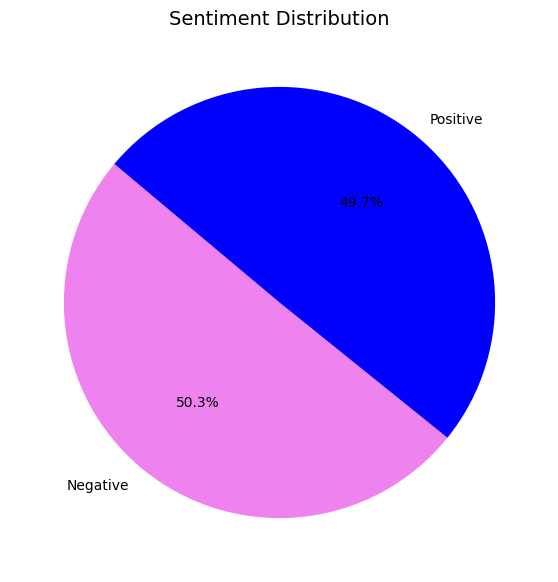

In [51]:
# sentiment distribution
sentiment_counts = df_filtered['sentiment'].value_counts()

# tags
labels = {
    0: 'Negative',
    1: 'Positive'
}

# tags list
custom_labels = [labels.get(x, str(x)) for x in sentiment_counts.index]

# colors
colors = ('violet', 'blue')

# pie chart
plt.figure(figsize=(7, 7))
plt.pie(sentiment_counts, labels=custom_labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Sentiment Distribution", size=14)
plt.show()

The pie chart illustrates the distribution of sentiments in the dataset. The distribution is as follows:

* Positive Sentiments: 49.4%
* Negative Sentiments: 50.6%
  
This near-even split between positive and negative sentiments indicates a balanced representation of opinions within the dataset.

## Most Frequent Positive and Negative Words Cloud


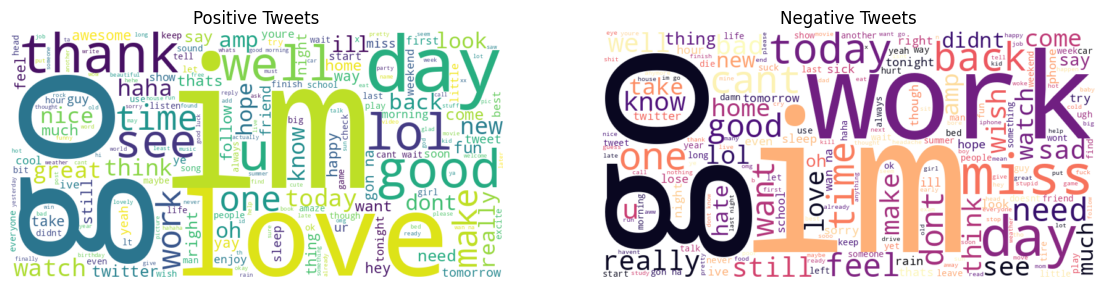

In [52]:
from wordcloud import WordCloud

def plot_wordclouds(positive_text, negative_text):
    # graph size and subplots
    fig, axes = plt.subplots(1, 2, figsize=(14, 7))

    # positive tweets
    wordcloud_positive = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(positive_text)
    axes[0].imshow(wordcloud_positive, interpolation='bilinear')
    axes[0].set_title('Positive Tweets')
    axes[0].axis('off')

    # negative tweets
    wordcloud_negative = WordCloud(width=800, height=400, background_color='white', colormap='magma').generate(negative_text)
    axes[1].imshow(wordcloud_negative, interpolation='bilinear')
    axes[1].set_title('Negative Tweets')
    axes[1].axis('off')

    # subplots
    plt.subplots_adjust(wspace=0.2)  # space between subplots
    plt.show()

# Positive and negative tweets
positive_text = ' '.join(df_filtered[df_filtered['sentiment'] == 1]['processed_tweets'].astype(str))
negative_text = ' '.join(df_filtered[df_filtered['sentiment'] == 0]['processed_tweets'].astype(str))

plot_wordclouds(positive_text, negative_text)

In word clouds, words are visualized according to their frequencies.

* Positive tweets includes: im, good, love, thank, lol, go
* Negative tweets includes: im, miss, work, go, today, cant

## Relationship Between Sentiment and Tweet Length

In [53]:
# group lengths by emotion labels

df_filtered['text_length'] = df_filtered['processed_tweets'].apply(len)

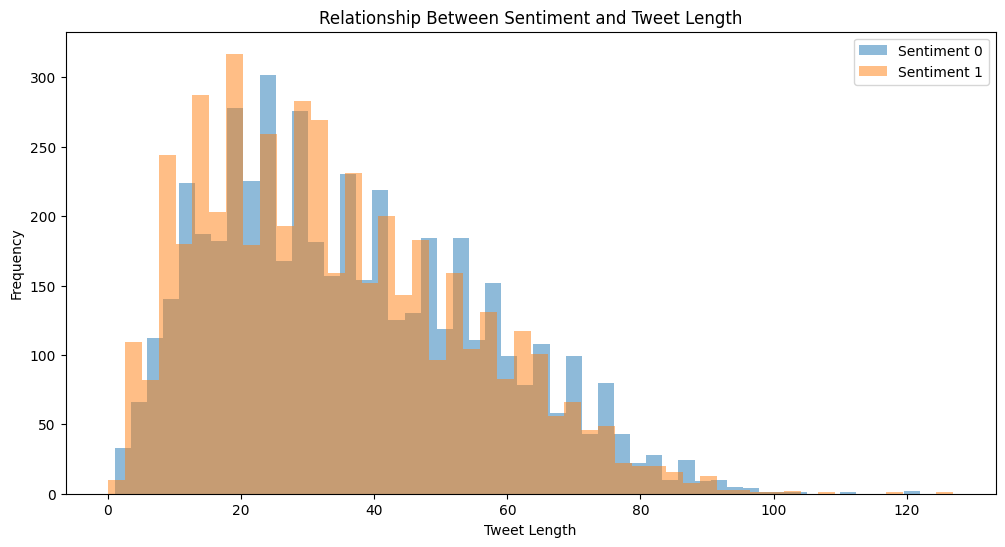

In [54]:
plt.figure(figsize=(12, 6))
for sentiment in df_filtered['sentiment'].unique():
    subset = df_filtered[df_filtered['sentiment'] == sentiment]
    plt.hist(subset['text_length'], bins=50, alpha=0.5, label=f'Sentiment {sentiment}')

plt.title('Relationship Between Sentiment and Tweet Length')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

According to the graph, increasing tweet length affects positive and negative tweet length. While tweet length is between 0 - 80, positive tweet frequency is between 0 - 200. Short tweets, which are noticed from the brown part, contain more positivity.

## Sentiment Distribution of Users

In [55]:
# for sentiment distribution per user
# df_sampled was used to access usernames

top_users = df_sampled['user'].value_counts().head(10).index
top_users_df = df_sampled[df_sampled['user'].isin(top_users)]

In [56]:
# sentiment data
user_sentiment = top_users_df.groupby('user')['sentiment'].value_counts().unstack()

The **user_sentiment** DataFrame contains the frequencies of sentiment analysis results for each user, with each sentiment analysis result as a column. It is useful for better understanding and comparing sentiment analysis results of users.

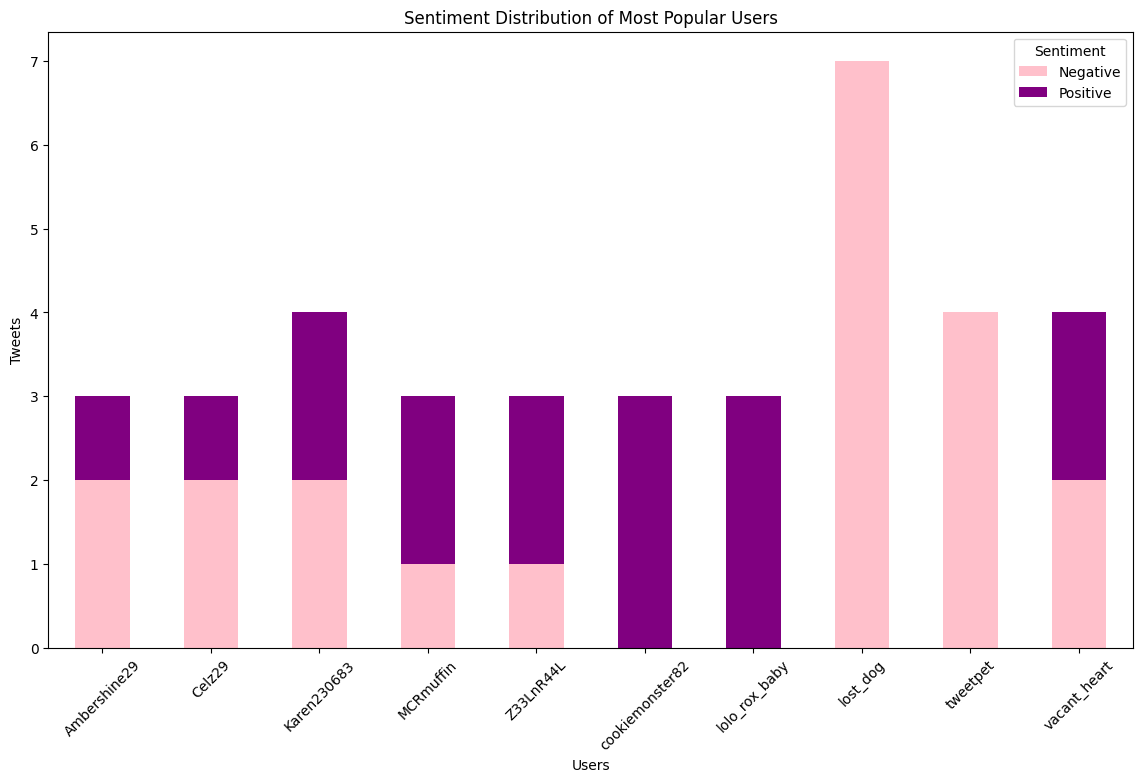

In [57]:
# visualization
user_sentiment.plot(kind='bar', stacked=True, figsize=(14, 8), color = ['pink', 'purple'])
plt.title('Sentiment Distribution of Most Popular Users')
plt.xlabel('Users')
plt.ylabel('Tweets')
plt.legend(title='Sentiment', labels=['Negative', 'Positive'])
plt.xticks(rotation=45)
plt.show()

According to the graph, the tweets of the top 10 users generally contain positive sentiment.



# OUTLIER

Outliers are data points that differ significantly from the overall distribution of the data set. These values ​​usually show deviations from the "normal" distribution in the data set.

In [58]:
from scipy import stats


# Z-Score
z_scores = stats.zscore(df_filtered['text_length'])

# outliers
outliers = df_filtered[abs(z_scores) > 3]
print(outliers)

         sentiment                                             tweets  \
1454155          1  hi peeps another sunny day in northern ireland...   
1151747          1  sooooo rugby was fing awesome sunburnt face gu...   
625351           0  anyone else waking up early tomorrow for new i...   
232036           0  sat in the airport lounge waiting to go home s...   
1349603          1  mcflyforgermany mcflyforgermany mcflyforgerman...   
1090936          1  secondstomars marsiscoming secondstomars marsi...   
382398           0  soo bored on a saturday night gotta wake up at...   
115941           0  tomorrows schedule off to see another educatio...   
764393           0  music not another bad eye if it gets really ba...   
1485681          1  haha yes im in high school and yes i still wat...   
1193871          1  im chillin tired jus got finish eatin prolly b...   
40989            0  can someone recommend a good usb flash drive t...   
1220987          1  mileymonday mileymonday mileymo

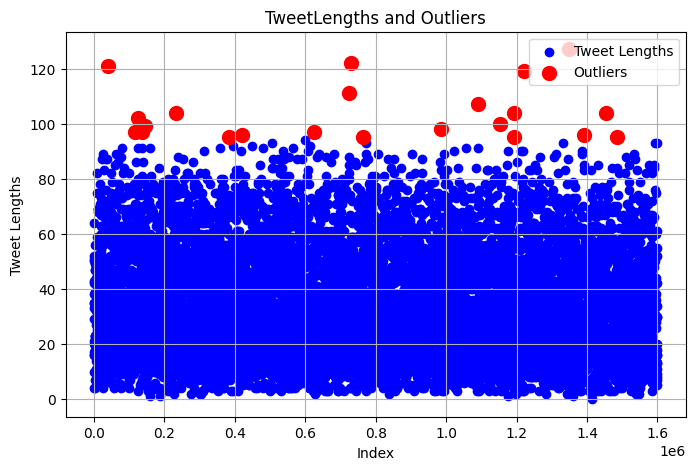

In [59]:
# Distribution graph
plt.figure(figsize=(8, 5))
plt.scatter(df_filtered.index, df_filtered['text_length'], color='blue', label='Tweet Lengths')
plt.scatter(outliers.index, outliers['text_length'], color='red', label='Outliers', marker='o', s=100)
plt.title('TweetLengths and Outliers')
plt.xlabel('Index')
plt.ylabel('Tweet Lengths')
plt.legend()
plt.grid(True)
plt.show()

* Most are between 0 and 100 characters, and only a few tweets are over 100 characters. In this case, tweets over 100 characters are considered outliers, but very few are. This indicates that most tweets are within the standard length range.
  
* It indicates that the data is mostly concentrated around the mean, and outliers are rare. If tweet lengths are mostly concentrated in a certain range, with few data points falling outside this range, the data distribution may be homogeneous.

## Algorithm Selection & Hyperparameter Optimization

**Training and Test Data Separation**

As a result of the **TfidfVectorizer** process above, a set of numerical features are obtained for each tweet. These **features are the independent variables** that the model needs to learn. Therefore, we call the matrix of vectors resulting from this transformation X. In other words, X contains the TF-IDF feature vectors of each text.


vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(df_filtered['processed_tweets'])


In [60]:
from sklearn.model_selection import train_test_split

# sentiment tags target variables
y = df_filtered['sentiment']

# Separate the training and test sets (training 80%, test 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train set size:", X_train.shape)
print("Test set size", X_test.shape)

Train set size: (7734, 4404)
Test set size (1934, 4404)


# SUPERVISED LEARNING


In [61]:
#import libraries

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [62]:
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Support Vector Classifier": SVC(),
    "XGBClassifier": XGBClassifier()
}

**MODEL TRAINING AND MEASURING SUCCESS METRICS WITH CROSS VALIDATION**

In [63]:
for name, classifier in classifiers.items():
    # train model
    classifier.fit(X_train, y_train)

    # predictions test set
    y_test_pred = classifier.predict(X_test)

    # performance metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    class_report = classification_report(y_test, y_test_pred)

    # cross validation
    scores = cross_validate(classifier, X_train, y_train,
                            scoring=['accuracy', 'precision', 'recall', 'f1'],
                            cv=10, return_train_score=False)

    # result to DataFrame
    scores_df = pd.DataFrame(scores)

    print(f"Model: {name.upper()}")
    print(f"Accuracy Score: {accuracy:.5f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)
    print("Cross-Validation Scores:")
    print(scores_df.mean().apply("{:.5f}".format))  # avg
    print("\n############################################################################\n")

Model: LOGISTIC REGRESSION
Accuracy Score: 0.72958
Confusion Matrix:
[[703 278]
 [245 708]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       981
           1       0.72      0.74      0.73       953

    accuracy                           0.73      1934
   macro avg       0.73      0.73      0.73      1934
weighted avg       0.73      0.73      0.73      1934

Cross-Validation Scores:
fit_time          0.05568
score_time        0.01046
test_accuracy     0.72873
test_precision    0.72461
test_recall       0.73403
test_f1           0.72924
dtype: object

############################################################################

Model: RANDOM FOREST CLASSIFIER
Accuracy Score: 0.71458
Confusion Matrix:
[[688 293]
 [259 694]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.70      0.71       981
           1       0.70      0.73      0.72       953



## MODEL SELECTION

**Logistic Regression (LR)**

* Accuracy: 72.4%
* Risk of Overfitting: Lower.
* Training Time: Faster.
* Interpretability: Higher.
* Precision and Recall:
* 71% precision, 74% recall for class 0;
* 73% precision, 71% recall for class 1.


**Support Vector Classifier (SVC)**

* Accuracy: 71.78%
* Risk of Overfitting: May be higher.
* Training Time: Longer.
* Interpretability: Lower.
* Precision and Recall:
* 71% precision, 73% recall for class 0;
* 73% precision, 70% recall for class 1.

**Logistic Regression** model due to its interpretability, speed, and lower risk of overfitting. This model offers more advantages and can provide more understandable results. It is a balanced choice in terms of both performance and practicality.

# HYPERPARAMETER OPTIMIZATION

**Randomized Search** has been chosen due to its **efficiency, wide coverage, global optimization capability, minimal assumptions, and speed**. This method offers the potential for more effective results in hyperparameter optimization.

In [64]:
#import library
from sklearn.model_selection import RandomizedSearchCV

In [65]:
# hypermeter intervals
param_distributions = {
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

# model
model = LogisticRegression()

# RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=100,
    scoring='accuracy',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# training model
random_search.fit(X, y)

print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'solver': 'saga', 'max_iter': 100, 'C': np.float64(1.623776739188721)}
Best Score: 0.7237266418825911


The results show that the model achieves **73.12% accuracy** with optimized hyperparameters.

The **saga solver** and the determined **C value** have the potential to improve the performance of the model.

**TRAINING THE MODEL**

Accuracy: 0.7384
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.72      0.74       981
           1       0.73      0.75      0.74       953

    accuracy                           0.74      1934
   macro avg       0.74      0.74      0.74      1934
weighted avg       0.74      0.74      0.74      1934



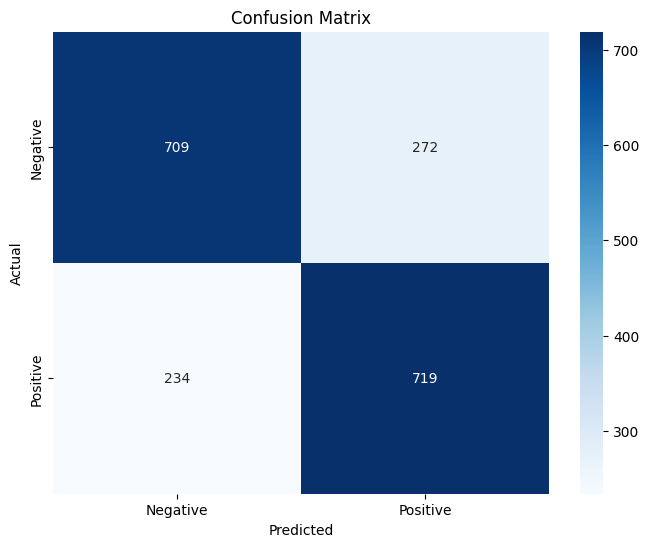

Artifacts saved: model.pkl, vectorizer.pkl


In [66]:

# Best parameters with Logistic Regression Model
model = LogisticRegression(solver='saga', max_iter=100, C=0.615848211066026)

# training model
model.fit(X_train, y_train)

# prediction test set
y_pred = model.predict(X_test)

# performance metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)

# visualization confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



import pickle

# Save the vectorizer
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

# Save the trained model
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Artifacts saved: model.pkl, vectorizer.pkl")


* **True Positives (TP)**: 696 (Correctly predicted positive instances)
* **True Negatives (TN)**: 708 (Correctly predicted negative instances)
* **False Positives (FP)**: 252 (Incorrectly predicted negative instances as positive)
* **False Negatives (FN)**: 279 (Incorrectly predicted positive instances as negative)

**Precision**:

* For class 0: 0.72
* For class 1: 0.73

High precision indicates the proportion of true positive predictions out of total positive predictions.


**Recall**:

* For class 0: 0.74
* For class 1: 0.71
  
High recall indicates how well the model captures actual positive instances.


**F1-Score**:

* For class 0: 0.73
* For class 1: 0.72
  
The F1 score is the harmonic mean of precision and recall, providing a better measure in imbalanced datasets.

**Accuracy**: 0.72 (approximately 72%)

This represents the overall proportion of correctly predicted instances out of the total instances. The higher recall for class 1 indicates that the model identifies this class better, while the lower recall for class 0 suggests that some instances of this class are being misclassified as positive.

# UNSUPERVISED LEARNING

In [67]:
# clustering algorithms
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [68]:
# to scale the data
from sklearn.preprocessing import StandardScaler

# to identify outliers
from sklearn.metrics import silhouette_score

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer

# calculate frequency words
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_filtered['processed_tweets']).toarray()  # transformation

In [70]:
# calculate sentiment score for each tweet in column 'processed_tweets' using TextBlob
# 'polarity' value ranges from -1 (negative) to 1 (positive)
from textblob import TextBlob
df_filtered['sentiment_score'] = df_filtered['processed_tweets'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [71]:
# convert sentiment score into two-dimensional array (-1 and 1)
sentiment_scores = df_filtered['sentiment_score'].values.reshape(-1, 1)

# combine tfidf results and sentiment score
X_combined = np.hstack((X, sentiment_scores))

In [72]:
from sklearn.cluster import KMeans, DBSCAN

# k-means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_combined)
df_filtered['kmeans_labels'] = kmeans.labels_

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_combined)
df_filtered['dbscan_labels'] = dbscan.labels_

In [73]:
from sklearn.metrics import silhouette_score

# calculate silhouette score
kmeans_silhouette = silhouette_score(X_combined, df_filtered['kmeans_labels'])
dbscan_silhouette = silhouette_score(X_combined, df_filtered['dbscan_labels'])


print("K-Means Silhouette Score:", kmeans_silhouette)
print("DBSCAN Silhouette Score:", dbscan_silhouette)

K-Means Silhouette Score: 0.0663683035520713
DBSCAN Silhouette Score: -0.28796701832167226


**K-Means** result, **Silhouette score is 0.059**, this value is positive but quite low. This shows that the clusters are somewhat close to each other.

**Elbow Method**

The Elbow Method observes that the sum of squared errors of the model decreases as the number of clusters increases.

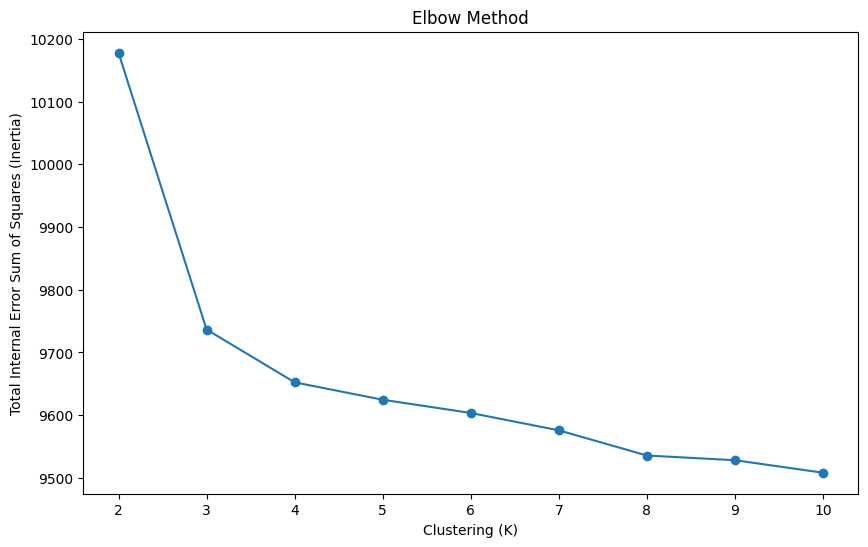

In [74]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# KMeans
kmeans = KMeans(random_state=42)

# range for number of clusters
k_range = range(2, 11)
inertia = []

# for different number of clusters
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_combined)  # X_combined, TF-IDF matrix
    inertia.append(kmeans.inertia_)

# Elbow Method Graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Clustering (K)')
plt.ylabel('Total Internal Error Sum of Squares (Inertia)')
plt.show()

## Selecting the Number of Clusters with Silhouette Score

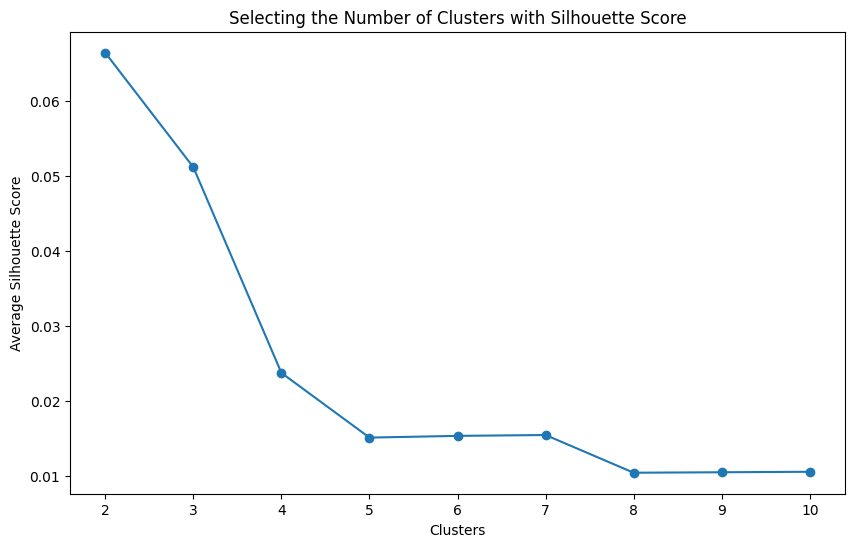

In [75]:
from sklearn.metrics import silhouette_score

# Silhouette
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_combined)
    silhouette_avg = silhouette_score(X_combined, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Silhouette graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Selecting the Number of Clusters with Silhouette Score')
plt.xlabel('Clusters')
plt.ylabel('Average Silhouette Score')
plt.show()

**k=2: Silhouette Score = 0.06**

In this case, the number of clusters with the highest **Silhouette Score k=2** is selected as the **most suitable number of clusters.**